In [1]:
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

In [3]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
#import data
rawData = pd.read_csv('defaultpayment.csv', header=1)
rawData.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
#examine data to confirm ALL is ok
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
default      30000 non-null int64
dtypes: int64(24)
memory usage: 5.5 MB


In [11]:
#correlation using pandas
corrMat = rawData.corr()
print(corrMat)

           LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE     PAY_0  \
LIMIT_BAL   1.000000  0.024755  -0.219161 -0.108139  0.144713 -0.271214   
SEX         0.024755  1.000000   0.014232 -0.031389 -0.090874 -0.057643   
EDUCATION  -0.219161  0.014232   1.000000 -0.143464  0.175061  0.105364   
MARRIAGE   -0.108139 -0.031389  -0.143464  1.000000 -0.414170  0.019917   
AGE         0.144713 -0.090874   0.175061 -0.414170  1.000000 -0.039447   
PAY_0      -0.271214 -0.057643   0.105364  0.019917 -0.039447  1.000000   
PAY_2      -0.296382 -0.070771   0.121566  0.024199 -0.050148  0.672164   
PAY_3      -0.286123 -0.066096   0.114025  0.032688 -0.053048  0.574245   
PAY_4      -0.267460 -0.060173   0.108793  0.033122 -0.049722  0.538841   
PAY_5      -0.249411 -0.055064   0.097520  0.035629 -0.053826  0.509426   
PAY_6      -0.235195 -0.044008   0.082316  0.034345 -0.048773  0.474553   
BILL_AMT1   0.285430 -0.033642   0.023581 -0.023472  0.056239  0.187068   
BILL_AMT2   0.278314 -0.0

In [12]:
#covariance using pandas
covMat = rawData.cov()
print(covMat)

              LIMIT_BAL          SEX     EDUCATION     MARRIAGE  \
LIMIT_BAL  1.683446e+10  1571.050630 -22474.028945 -7323.669658   
SEX        1.571051e+03     0.239247      0.005502    -0.008014   
EDUCATION -2.247403e+04     0.005502      0.624651    -0.059184   
MARRIAGE  -7.323670e+03    -0.008014     -0.059184     0.272452   
AGE        1.730767e+05    -0.409726      1.275380    -1.992764   
PAY_0     -3.954593e+04    -0.031685      0.093584     0.011683   
PAY_2     -4.603765e+04    -0.041442      0.115025     0.015122   
PAY_3     -4.443225e+04    -0.038694      0.107861     0.020421   
PAY_4     -4.057181e+04    -0.034411      0.100528     0.020213   
PAY_5     -3.667056e+04    -0.030521      0.087340     0.021074   
PAY_6     -3.509308e+04    -0.024754      0.074816     0.020616   
BILL_AMT1  2.727020e+09 -1211.694332   1372.377644  -902.154685   
BILL_AMT2  2.570130e+09 -1085.595467   1054.657595  -802.517866   
BILL_AMT3  2.548533e+09  -833.207432    712.664124  -901.67908

In [15]:
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
#Count of Clients by Sex
#Gender 1 = male; 2 = female
rawData.groupby('SEX')['SEX'].count()

SEX
1    11888
2    18112
Name: SEX, dtype: int64

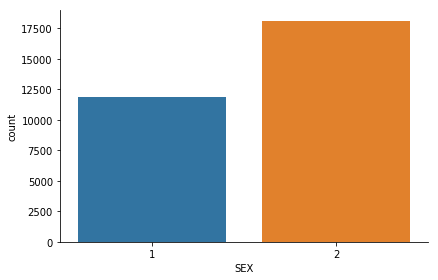

In [16]:
# Plot the number of males and females
#Gender 1 = male; 2 = female
sns.factorplot('SEX', data=rawData, kind='count', aspect=1.5)

In [17]:
# Number of men and women grouped by default
#Gender 1 = male; 2 = female
# default payment 1 = Yes; 0 = No 
rawData.groupby(['SEX', 'default'])['SEX'].count()

SEX  default
1    0           9015
     1           2873
2    0          14349
     1           3763
Name: SEX, dtype: int64

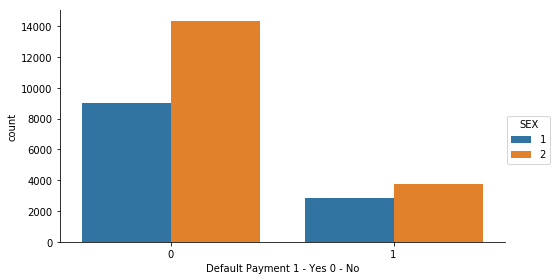

In [18]:
# Group by Sex and Default
# Gender 1 = male; 2 = female
# default payment 1 = Yes; 0 = No 
g = sns.factorplot('default', data=rawData, hue='SEX', kind='count', aspect=1.75)
g.set_xlabels('Default Payment 1 - Yes 0 - No')

In [19]:
#Count of Clients by Education
#Education (1 = graduate school; 2 = university; 3 = high school; 0, 4, 5, 6 = others).
rawData.groupby('EDUCATION')['EDUCATION'].count()

EDUCATION
0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: EDUCATION, dtype: int64

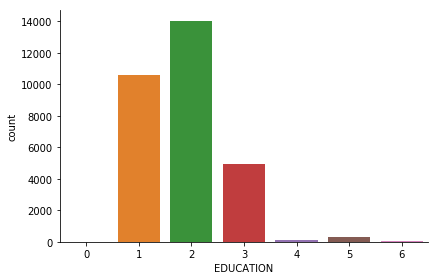

In [20]:
# Plot the number of males and females
#Education (1 = graduate school; 2 = university; 3 = high school; 0, 4, 5, 6 = others).
sns.factorplot('EDUCATION', data=rawData, kind='count', aspect=1.5)

In [21]:
# Number Education grouped by default
#Education (1 = graduate school; 2 = university; 3 = high school; 0, 4, 5, 6 = others).
# default payment 1 = Yes; 0 = No 
rawData.groupby(['EDUCATION', 'default'])['EDUCATION'].count()

EDUCATION  default
0          0             14
1          0           8549
           1           2036
2          0          10700
           1           3330
3          0           3680
           1           1237
4          0            116
           1              7
5          0            262
           1             18
6          0             43
           1              8
Name: EDUCATION, dtype: int64

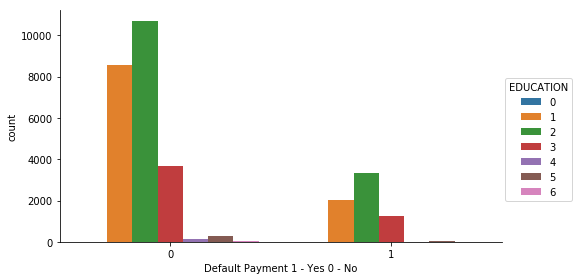

In [22]:
# Group by Education and Default
#Education (1 = graduate school; 2 = university; 3 = high school; 0, 4, 5, 6 = others).
# default payment 1 = Yes; 0 = No 
g = sns.factorplot('default', data=rawData, hue='EDUCATION', kind='count', aspect=1.75)
g.set_xlabels('Default Payment 1 - Yes 0 - No')

In [23]:
#Count of Clients by Marrital Status
#Marital status (1 = married; 2 = single; 3 = divorce; 0=others).
rawData.groupby('MARRIAGE')['MARRIAGE'].count()

MARRIAGE
0       54
1    13659
2    15964
3      323
Name: MARRIAGE, dtype: int64

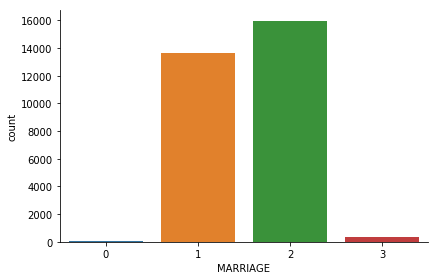

In [24]:
# Plot the number by Marrital Status
#Marital status (1 = married; 2 = single; 3 = divorce; 0=others).
sns.factorplot('MARRIAGE', data=rawData, kind='count', aspect=1.5)

In [25]:
# Number Marrital Status grouped by default
#Marital status (1 = married; 2 = single; 3 = divorce; 0=others).
# default payment 1 = Yes; 0 = No 
rawData.groupby(['MARRIAGE', 'default'])['MARRIAGE'].count()

MARRIAGE  default
0         0             49
          1              5
1         0          10453
          1           3206
2         0          12623
          1           3341
3         0            239
          1             84
Name: MARRIAGE, dtype: int64

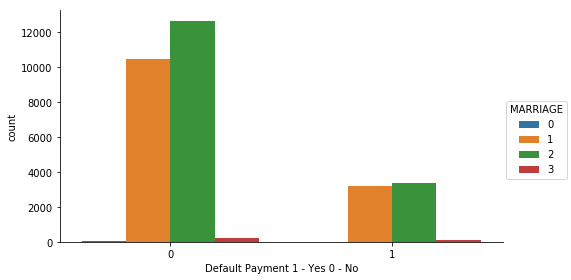

In [26]:
# Group by Marrital Status and Default
#Marital status (1 = married; 2 = single; 3 = divorce; 0=others).
# default payment 1 = Yes; 0 = No 
g = sns.factorplot('default', data=rawData, hue='MARRIAGE', kind='count', aspect=1.75)
g.set_xlabels('Default Payment 1 - Yes 0 - No')

In [27]:
#Count of Clients by Default
# default payment 1 = Yes; 0 = No
rawData.groupby('default')['default'].count()

default
0    23364
1     6636
Name: default, dtype: int64

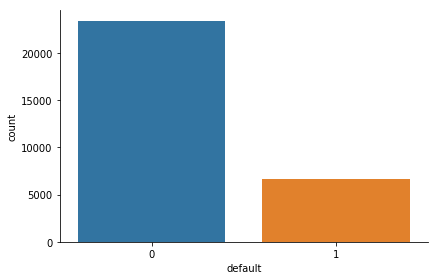

In [28]:
# Plot the number by Default
# default payment 1 = Yes; 0 = No
sns.factorplot('default', data=rawData, kind='count', aspect=1.5)

In [29]:
Defaulted = rawData[rawData['default']==1]
# Total number of passengers who defaulted 
len(Defaulted)

6636

In [30]:
# Clients who defaulted by education and gender.
# Gender (1 = male; 2 = female).
# Education (1 = graduate school; 2 = university; 3 = high school; 0, 4, 5, 6 = others).
Defaulted.pivot_table('default', 'SEX', 'EDUCATION', aggfunc=len, margins=True)

EDUCATION,1,2,3,4,5,6,All
SEX,,,,,,,
1,906,1408,545,4,6,4,2873
2,1130,1922,692,3,12,4,3763
All,2036,3330,1237,7,18,8,6636


In [31]:
# Clients who defaulted by education and gender.
# Gender (1 = male; 2 = female).
# Marital status (1 = married; 2 = single; 3 = divorce; 0=others).
Defaulted.pivot_table('default', 'SEX', 'MARRIAGE', aggfunc=len, margins=True)

MARRIAGE,0,1,2,3,All
SEX,,,,,
1,2,1346,1485,40,2873
2,3,1860,1856,44,3763
All,5,3206,3341,84,6636


In [33]:
# Clients who defaulted grouped by education, marrital status and sex
# Gender (1 = male; 2 = female).
# Marital status (1 = married; 2 = single; 3 = divorce; 0=others).
# Education (1 = graduate school; 2 = university; 3 = high school; 0, 4, 5, 6 = others).
table = pd.crosstab(index=[rawData.default,rawData.MARRIAGE], columns=[rawData.SEX,rawData.EDUCATION])
table.unstack()

SEX        1                                      ...   2                      \
EDUCATION  0           1                  2       ...   4     5             6   
MARRIAGE   0  1  2  3  0     1     2   3  0     1 ...   2  3  0   1   2  3  0   
default                                           ...                           
0          0  2  6  0  1  1300  2127  20  1  1727 ...  43  2  0  97  74  2  0   
1          0  0  0  0  0   390   506  10  0   643 ...   2  0  0   5   7  0  0   

SEX                  
EDUCATION            
MARRIAGE    1  2  3  
default              
0          13  7  2  
1           1  3  0  

[2 rows x 56 columns]

In [35]:
#Age Summary
rawData.AGE.describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,"Distribution of Passengers' Ages")

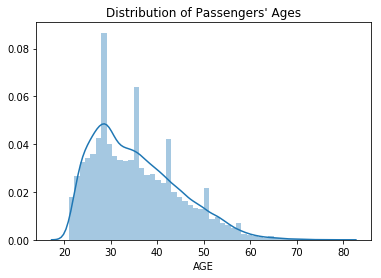

In [36]:
# Distribution of age, with an overlay of a density plot
age_dist = sns.distplot(rawData.AGE)
age_dist.set_title("Distribution of Passengers' Ages")

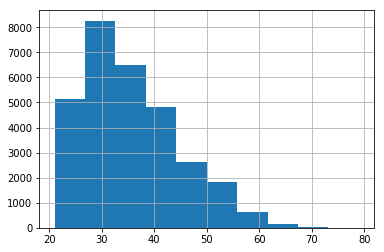

In [37]:
# histogram of ages
rawData['AGE'].hist(bins=10)

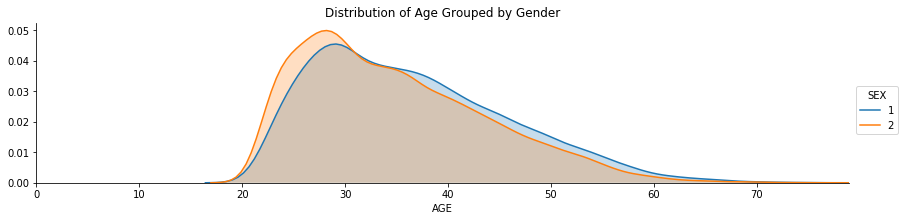

In [38]:
#Distribution of age grouped by gender
#Gender (1 = male; 2 = female)
fig = sns.FacetGrid(rawData, hue='SEX', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = rawData['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Gender')
fig.add_legend()

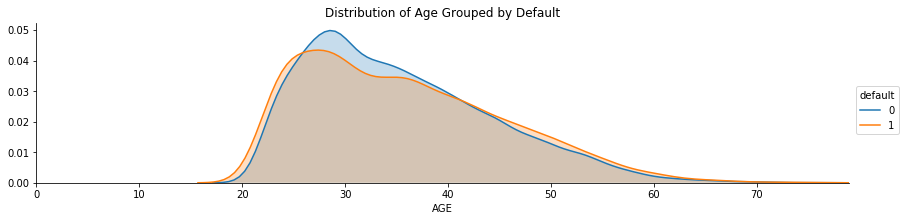

In [39]:
#Distribution of age grouped by default
#default payment (Yes = 1, No = 0)
fig = sns.FacetGrid(rawData, hue='default', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = rawData['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Default')
fig.add_legend()

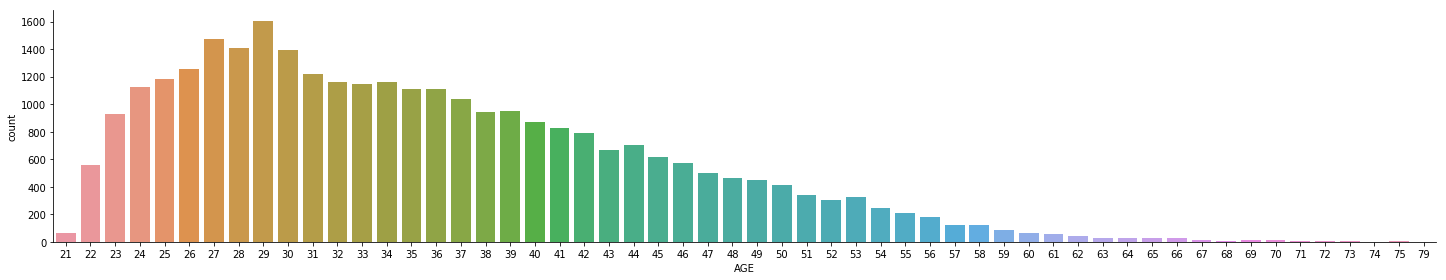

In [42]:
# Plot the number of males and females
#Gender 1 = male; 2 = female
sns.factorplot('AGE', data=rawData, kind='count', aspect=5.0)

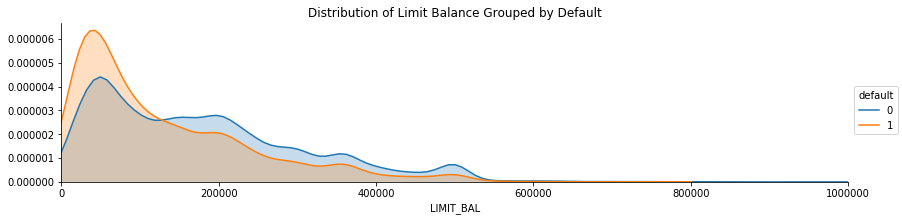

In [43]:
#Distribution of Limit Balance grouped by default
#default payment (Yes = 1, No = 0)
fig = sns.FacetGrid(rawData, hue='default', aspect=4)
fig.map(sns.kdeplot, 'LIMIT_BAL', shade=True)
oldest = rawData['LIMIT_BAL'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Limit Balance Grouped by Default')
fig.add_legend()

In [20]:
## Creating dataset for RFE
RFEdataset = pd.read_csv('defaultpayment.csv', header=1)

In [21]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [22]:
RFEdataset.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [23]:
#Selecting X and Y for RFE
X = RFEdataset.iloc[:,0:23]
y = RFEdataset.default

In [24]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [25]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: default, dtype: int64

In [26]:
#feature extraction
model = LogisticRegression()

In [27]:
rfe = RFE(model, 10)

In [28]:
fit = rfe.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [29]:
fit

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
  n_features_to_select=10, step=1, verbose=0)

In [30]:
rfe

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
  n_features_to_select=10, step=1, verbose=0)

In [31]:
fit.n_features_

10

In [32]:
fit.support_

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [33]:
fit.ranking_

array([10,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  5,  4, 12, 14,  9, 13,
        2,  3,  7,  6,  8, 11])

In [38]:
#Dropping Attributes/Columns 0,11,12,13,14,15,16,17,18,19,20,21,22
#Dropping Coumn 0
del RFEdataset['LIMIT_BAL']

In [39]:

RFEdataset.head()

,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,2,2,1,24,2,2,-1,-1,-2,-2,...,0,0,0,0,689,0,0,0,0,1
1,2,2,2,26,-1,2,0,0,0,2,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,2,2,2,34,0,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,2,2,1,37,0,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,1,2,1,57,-1,0,-1,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [40]:
#Dropping Attributes/Columns 0,11,12,13,14,15,16,17,18,19,20,21,22
#Dropping Coumn 0
del RFEdataset['BILL_AMT4']
del RFEdataset['BILL_AMT5']
del RFEdataset['BILL_AMT6']
del RFEdataset['PAY_AMT1']
del RFEdataset['PAY_AMT2']
del RFEdataset['PAY_AMT3']
del RFEdataset['PAY_AMT4']
del RFEdataset['PAY_AMT5']
del RFEdataset['PAY_AMT6']

In [41]:
RFEdataset.head()

,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,default
0,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,1
1,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,1
2,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,0
3,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,0
4,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,0


In [68]:
## Creating dataset for FI Feature Importance
FIdataset = pd.read_csv('defaultpayment.csv', header=1)

In [67]:
from sklearn.ensemble import ExtraTreesClassifier

In [71]:
#Selecting X and Y for PCA
X = FIdataset.iloc[:,0:24]
y = FIdataset.default

In [72]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [73]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: default, dtype: int64

In [74]:
#feature extraction
model = ExtraTreesClassifier()
model.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [75]:
print(model.feature_importances_)

[3.59156210e-03 2.62433290e-04 7.71471575e-04 4.30438717e-04
 6.78631915e-04 7.07699423e-03 1.20970378e-02 1.68344642e-03
 9.93335960e-03 6.68375338e-03 3.37113986e-03 6.71328026e-04
 7.75481791e-04 6.92577212e-04 4.01677733e-04 5.72828314e-04
 6.34453147e-04 4.69632182e-04 3.74785444e-04 6.16730946e-04
 6.03680130e-04 8.78054134e-04 6.88728201e-04 9.46039774e-01]


In [76]:
#Dropping Attributes/Columns PAY_AMT5,BILL_AMT2,EDUCATION,BILL_AMT3,PAY_AMT6,AGE,BILL_AMT1,BILL_AMT6,PAY_AMT3,PAY_AMT4
#,BILL_AMT5,PAY_AMT1,MARRIAGE,BILL_AMT4,PAY_AMT2,SEX,
del FIdataset['PAY_AMT5']
del FIdataset['BILL_AMT2']
del FIdataset['EDUCATION']
del FIdataset['BILL_AMT3']
del FIdataset['PAY_AMT6']
del FIdataset['AGE']
del FIdataset['BILL_AMT1']
del FIdataset['BILL_AMT6']
del FIdataset['PAY_AMT3']
del FIdataset['PAY_AMT4']
del FIdataset['BILL_AMT5']
del FIdataset['PAY_AMT1']
del FIdataset['MARRIAGE']
del FIdataset['BILL_AMT4']
del FIdataset['PAY_AMT2']
del FIdataset['SEX']

In [77]:
FIdataset.head()

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default
0,20000,2,2,-1,-1,-2,-2,1
1,120000,-1,2,0,0,0,2,1
2,90000,0,0,0,0,0,0,0
3,50000,0,0,0,0,0,0,0
4,50000,-1,0,-1,0,0,0,0


In [78]:
#dependent variable
depVar = rawData['default']

In [79]:
#Training Set (Feature Space: X Training)
#first 1000 rows: only for this example you will still follow a 70/30 split for your final models
X_train = (rawData[: 21000])
X_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [80]:
#Dependent Variable Training Set (y Training)
#Establish the training set for the Y-variable or dependent variable-the number of rows much match the X-training set
y_train = depVar[: 21000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 21000


0    1
1    1
2    0
3    0
4    0
Name: default, dtype: int64

In [81]:
#Testing Set (X Testing)
#Establish the testing set for the X-Variables or Feature space
X_test = rawData[-9000:]
X_test_count = len(X_test.index)
print('The number of observations in the rawData testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the rawData testing set is: 9000
       LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
21000      30000    1          2         1   36      1     -1     -1     -1   
21001     280000    1          3         1   40      2      0      0      0   
21002     260000    1          2         1   37      0      0      0      0   
21003     200000    1          2         2   32      2      0      0      0   
21004      80000    1          2         2   32      2      0      0      0   

       PAY_5   ...     BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
21000      0   ...          1170        780          0       780         0   
21001      0   ...        191291     189029     192023     10000      9000   
21002      0   ...         23186      14117      15797      3203      6015   
21003     -2   ...             0          0          0      7600      4000   
21004      0   ...         67352      74448      72928      3000      40

In [83]:
#Ground Truth (y_test) 
y_test = depVar[-9000:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 9000


21000    0
21001    1
21002    0
21003    1
21004    1
Name: default, dtype: int64

In [18]:
##implement Cross Validation anytime we need to by simply running the following on the X and Y training sets
#X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
##We can also use the shape function to double check that the split was made as needed:
#X_train.shape, X_test.shape


In [84]:
#Logistic Regression for RawData
from sklearn.linear_model import LogisticRegression

In [85]:
#Models
#Establish variables that you will use for defining each model
logreg = LogisticRegression()

In [86]:
logreg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [87]:
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.77
Accuracy of Logistic regression classifier on test set: 0.80


In [88]:
#Decision Tree for RawData
from sklearn.tree import DecisionTreeClassifier


In [89]:
#Establish variables that you will use for defining each model
clf = DecisionTreeClassifier().fit(X_train, y_train)

In [90]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 1.00


In [92]:
#Setting max decision tree depth to help avoid overfitting

clf2 = DecisionTreeClassifier(max_depth=5).fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf2.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf2.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 1.00


In [95]:
#GINI parameters for decision tree
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=5, min_samples_leaf=5).fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf_gini.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf_gini.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 1.00


In [96]:
#Entropy for decision tree
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf_entropy.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf_entropy.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 1.00


In [97]:
#KNN for RawData
from sklearn.neighbors import KNeighborsClassifier

In [98]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.81
Accuracy of K-NN classifier on test set: 0.77


In [99]:
#dependent variable for RFE
depVarRFE = RFEdataset['default']

In [100]:
#Training Set (Feature Space: X Training)
#first 1000 rows: only for this example you will still follow a 70/30 split for your final models
XRFE_train = (RFEdataset[: 21000])
XRFE_train.head()

,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,default
0,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,1
1,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,1
2,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,0
3,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,0
4,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,0


In [101]:
yRFE_train = depVarRFE[: 21000]
yRFE_train_count = len(yRFE_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
yRFE_train.head()

The number of observations in the Y training set are: 21000


0    1
1    1
2    0
3    0
4    0
Name: default, dtype: int64

In [102]:
#Testing Set (X Testing)
#Establish the testing set for the X-Variables or Feature space
XRFE_test = RFEdataset[-9000:]
XRFE_test_count = len(XRFE_test.index)
print('The number of observations in the rawData testing set is:',str(XRFE_test_count))
print(XRFE_test.head())

The number of observations in the rawData testing set is: 9000
       SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  \
21000    1          2         1   36      1     -1     -1     -1      0   
21001    1          3         1   40      2      0      0      0      0   
21002    1          2         1   37      0      0      0      0      0   
21003    1          2         2   32      2      0      0      0     -2   
21004    1          2         2   32      2      0      0      0      0   

       PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  default  
21000      0          0        780          0        0  
21001      0     178220     184848     188411        1  
21002      0     128602     118109      21557        0  
21003     -2     160106     162743      81890        1  
21004      2      79237      65301      67253        1  


In [103]:
#Ground Truth (y_test) 
yRFE_test = depVarRFE[-9000:]
yRFE_test_count = len(yRFE_test.index)
print('The number of observations in the Y training set are:',str(yRFE_test_count))
yRFE_test.head()

The number of observations in the Y training set are: 9000


21000    0
21001    1
21002    0
21003    1
21004    1
Name: default, dtype: int64

In [104]:
#Logistic Regression for RFEdataset
from sklearn.linear_model import LogisticRegression
#Establish variables that you will use for defining each model
logregRFE = LogisticRegression()
logregRFE.fit(XRFE_train, yRFE_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logregRFE.score(XRFE_train, yRFE_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logregRFE.score(XRFE_test, yRFE_test)))

Accuracy of Logistic regression classifier on training set: 0.85
Accuracy of Logistic regression classifier on test set: 0.86


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [105]:
#Decision Tree for RFEdataset
from sklearn.tree import DecisionTreeClassifier
clfRFE = DecisionTreeClassifier().fit(XRFE_train, yRFE_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clfRFE.score(XRFE_train, yRFE_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clfRFE.score(XRFE_test, yRFE_test)))



Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 1.00


In [106]:
#Setting max decision tree depth to help avoid overfitting

clf2RFE = DecisionTreeClassifier(max_depth=5).fit(XRFE_train, yRFE_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf2RFE.score(XRFE_train, yRFE_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf2RFE.score(XRFE_test, yRFE_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 1.00


In [107]:
#GINI parameters for decision tree
clfRFE_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=5, min_samples_leaf=5).fit(XRFE_train, yRFE_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clfRFE_gini.score(XRFE_train, yRFE_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clfRFE_gini.score(XRFE_test, yRFE_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 1.00


In [109]:
#Entropy for decision tree
clfRFE_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=3, min_samples_leaf=5)
clfRFE_entropy.fit(XRFE_train, yRFE_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clfRFE_entropy.score(XRFE_train, yRFE_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clfRFE_entropy.score(XRFE_test, yRFE_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 1.00


In [110]:
#KNN for RFEdatase
from sklearn.neighbors import KNeighborsClassifier
knnRFE = KNeighborsClassifier()
knnRFE.fit(XRFE_train, yRFE_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knnRFE.score(XRFE_train, yRFE_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knnRFE.score(XRFE_test, yRFE_test)))

Accuracy of K-NN classifier on training set: 0.82
Accuracy of K-NN classifier on test set: 0.77


In [111]:
#dependent variable for FI
depVarFI = FIdataset['default']

In [112]:
#Training Set (Feature Space: X Training)
#first 1000 rows: only for this example you will still follow a 70/30 split for your final models
XFI_train = (FIdataset[: 21000])
XFI_train.head()

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default
0,20000,2,2,-1,-1,-2,-2,1
1,120000,-1,2,0,0,0,2,1
2,90000,0,0,0,0,0,0,0
3,50000,0,0,0,0,0,0,0
4,50000,-1,0,-1,0,0,0,0


In [113]:
yFI_train = depVarFI[: 21000]
yFI_train_count = len(yFI_train.index)
print('The number of observations in the Y training set are:',str(yFI_train_count))
yFI_train.head()

The number of observations in the Y training set are: 21000


0    1
1    1
2    0
3    0
4    0
Name: default, dtype: int64

In [114]:
#Testing Set (X Testing)
#Establish the testing set for the X-Variables or Feature space
XFI_test = FIdataset[-9000:]
XFI_test_count = len(XFI_test.index)
print('The number of observations in the rawData testing set is:',str(XFI_test_count))
print(XFI_test.head())

The number of observations in the rawData testing set is: 9000
       LIMIT_BAL  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  default
21000      30000      1     -1     -1     -1      0      0        0
21001     280000      2      0      0      0      0      0        1
21002     260000      0      0      0      0      0      0        0
21003     200000      2      0      0      0     -2     -2        1
21004      80000      2      0      0      0      0      2        1


In [115]:
#Ground Truth (y_test) 
yFI_test = depVarFI[-9000:]
yFI_test_count = len(yFI_test.index)
print('The number of observations in the Y training set are:',str(yFI_test_count))
yFI_test.head()

The number of observations in the Y training set are: 9000


21000    0
21001    1
21002    0
21003    1
21004    1
Name: default, dtype: int64

In [116]:
#Logistic Regression for FIdataset
from sklearn.linear_model import LogisticRegression
#Establish variables that you will use for defining each model
logregFI = LogisticRegression()
logregFI.fit(XFI_train, yFI_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logregFI.score(XFI_train, yFI_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logregFI.score(XFI_test, yFI_test)))

Accuracy of Logistic regression classifier on training set: 0.77
Accuracy of Logistic regression classifier on test set: 0.80


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [117]:
#Decision Tree for FIdataset
from sklearn.tree import DecisionTreeClassifier
clfFI = DecisionTreeClassifier().fit(XFI_train, yFI_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clfFI.score(XFI_train, yFI_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clfFI.score(XFI_test, yFI_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 1.00


In [118]:
#Setting max decision tree depth to help avoid overfitting

clf2FI = DecisionTreeClassifier(max_depth=5).fit(XFI_train, yFI_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf2FI.score(XFI_train, yFI_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf2FI.score(XFI_test, yFI_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 1.00


In [119]:
#GINI parameters for decision tree
clfFI_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=5, min_samples_leaf=5).fit(XFI_train, yFI_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clfFI_gini.score(XFI_train, yFI_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clfFI_gini.score(XFI_test, yFI_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 1.00


In [120]:
#Entropy for decision tree
clfFI_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=3, min_samples_leaf=6)
clfFI_entropy.fit(XFI_train, yFI_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clfFI_entropy.score(XFI_train, yFI_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clfFI_entropy.score(XFI_test, yFI_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 1.00


In [121]:
#KNN for FIdatabse
from sklearn.neighbors import KNeighborsClassifier
knnFI = KNeighborsClassifier()
knnFI.fit(XFI_train, yFI_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knnFI.score(XFI_train, yFI_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knnFI.score(XFI_test, yFI_test)))

Accuracy of K-NN classifier on training set: 0.96
Accuracy of K-NN classifier on test set: 0.95


In [122]:
from sklearn.model_selection import cross_val_score

In [124]:
print(cross_val_score(knnFI, XFI_train, yFI_train))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[0.91615484 0.92457143 0.94127733]


In [125]:
## Predictions for logistic Regression RFEdatase logregRFE.fit(XRFE_train, yRFE_train)
##Accuracy 0.85

predictions = logregRFE.predict(XRFE_test)

In [126]:
predictions

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [132]:
#export to csv file
np.savetxt('C:/Users/maura/OneDrive/Desktop/predictions.csv',predictions,delimiter=',')